In [1]:
import numpy as np, json, random, \
    sklearn, scipy, math, matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from scipy.spatial.distance import cdist
from dataclasses import dataclass
from typing import List
from itertools import groupby
from dtaidistance import dtw

In [2]:
@dataclass
class Artifact:

    classification: str
    data: np.ndarray

In [3]:
with open('data_store/examples.json', 'r') as e:
    rd = json.load(e)
    data = [Artifact(dp['classification'], np.array(dp['anom']['data']).T) for dp in rd]

In [4]:
def pad_center(d: List[np.ndarray], max_len: int | None = None) -> np.ndarray:
    
    max_len = max(*[di.data.shape[1] for di in d], max_len or 0)

    padded = []
    
    for di in d:
        
        pad_needed = max_len - di.data.shape[1]
            
        left_pad, right_pad = pad_needed // 2, math.ceil(pad_needed / 2)
        
        p = np.pad(di.data, ((0, 0), (left_pad, right_pad)), mode='mean')
        
        padded.append(p)
        
    return np.array(padded)
    
x =pad_center(data)

In [7]:
x.shape

(45, 5, 230)

In [18]:
def predict(x: np.ndarray, data: List[Artifact]) -> str:
    
    x_len = x.shape[1]
    
    classes = [d.classification for d in data]
    
    padded_data = pad_center(data, x_len)
    
    # If our data longer then our example
    if x_len < padded_data.shape[1]:
        
        diff = padded_data.shape[1] - x_len
        
        left_pad, right_pad = diff // 2, math.ceil(diff / 2)
        
        x = np.pad(x, ((left_pad, right_pad)), mode='mean')
        
    values = []
        
    for di in padded_data:
        
        values.append(sum([dtw.distance_fast(xi, di) for xi, di in zip(x, di)]))
        
    cls_choice = []
    cls_values = []
    
    z = sorted(list(zip(values, classes)), key=lambda a: a[1])
        
    for c, vls in groupby(z, key=lambda a: a[1]):
        
        vls = [v[0] for v in list(vls)]
        
        cls_choice.append(c)
        cls_values.append(sum(vls) / len(vls))

    a = np.array(cls_values)
    
    a = (a - a.mean()) / a.std()
    
    probs = scipy.special.softmax(a)
    
    # for pro, cls in zip(probs, cls_choice):
        
    #     print(f'\t{cls}: {pro.item():.2f}')
    
    return cls_choice[probs.argmin().item()]

In [19]:
correct = 0

for i in range(len(data)):

    c = data[i].classification

    p = predict(x[i], data)
    
    if c == p: correct += 1
    else:
        print(c, p)
    
correct / len(data)

Down Look Up Look
Left Blink Left Look
Left Blink Left Look


0.9333333333333333

In [87]:
x[0].shape

(5, 230)

In [70]:
x.shape

(45, 5, 230)

In [214]:
print([di.classification for di in data])

['Double Blink', 'Up Look', 'Triple Blink', 'Double Blink', 'Left Blink', 'Down Look', 'Right Look', 'Left Blink', 'Up Look', 'Double Blink', 'Left Look', 'Triple Blink', 'Single Blink', 'Right Look', 'Right Look', 'Single Blink', 'Down Look', 'Right Blink', 'Left Look', 'Up Look', 'Single Blink', 'Left Look', 'Right Blink', 'Triple Blink', 'Right Blink', 'Left Blink', 'Down Look', 'Right Look', 'Left Blink', 'Left Look', 'Left Blink', 'Single Blink', 'Down Look', 'Double Blink', 'Triple Blink', 'Right Blink', 'Triple Blink', 'Double Blink', 'Right Blink', 'Up Look', 'Down Look', 'Left Look', 'Single Blink', 'Up Look', 'Right Look']


Up Look Double Blink
2967.856103100095
Up Look Up Look
0.0
Up Look Triple Blink
4050.7599316180476
Up Look Double Blink
2565.5753887380392
Up Look Left Blink
1530.1312044453848
Up Look Down Look
2509.266233837037
Up Look Right Look
1630.7275291024912
Up Look Left Blink
3059.3116940537366
Up Look Up Look
1336.1391008399949
Up Look Double Blink
2865.216215706923
Up Look Left Look
1513.2639129351714
Up Look Triple Blink
4384.374479224445
Up Look Single Blink
1839.3694320661773
Up Look Right Look
1500.488928274811
Up Look Right Look
1465.772105254908
Up Look Single Blink
1512.112758946724
Up Look Down Look
2355.0387667066116
Up Look Right Blink
9585.430376804998
Up Look Left Look
1547.0059344181802
Up Look Up Look
977.2133364366674


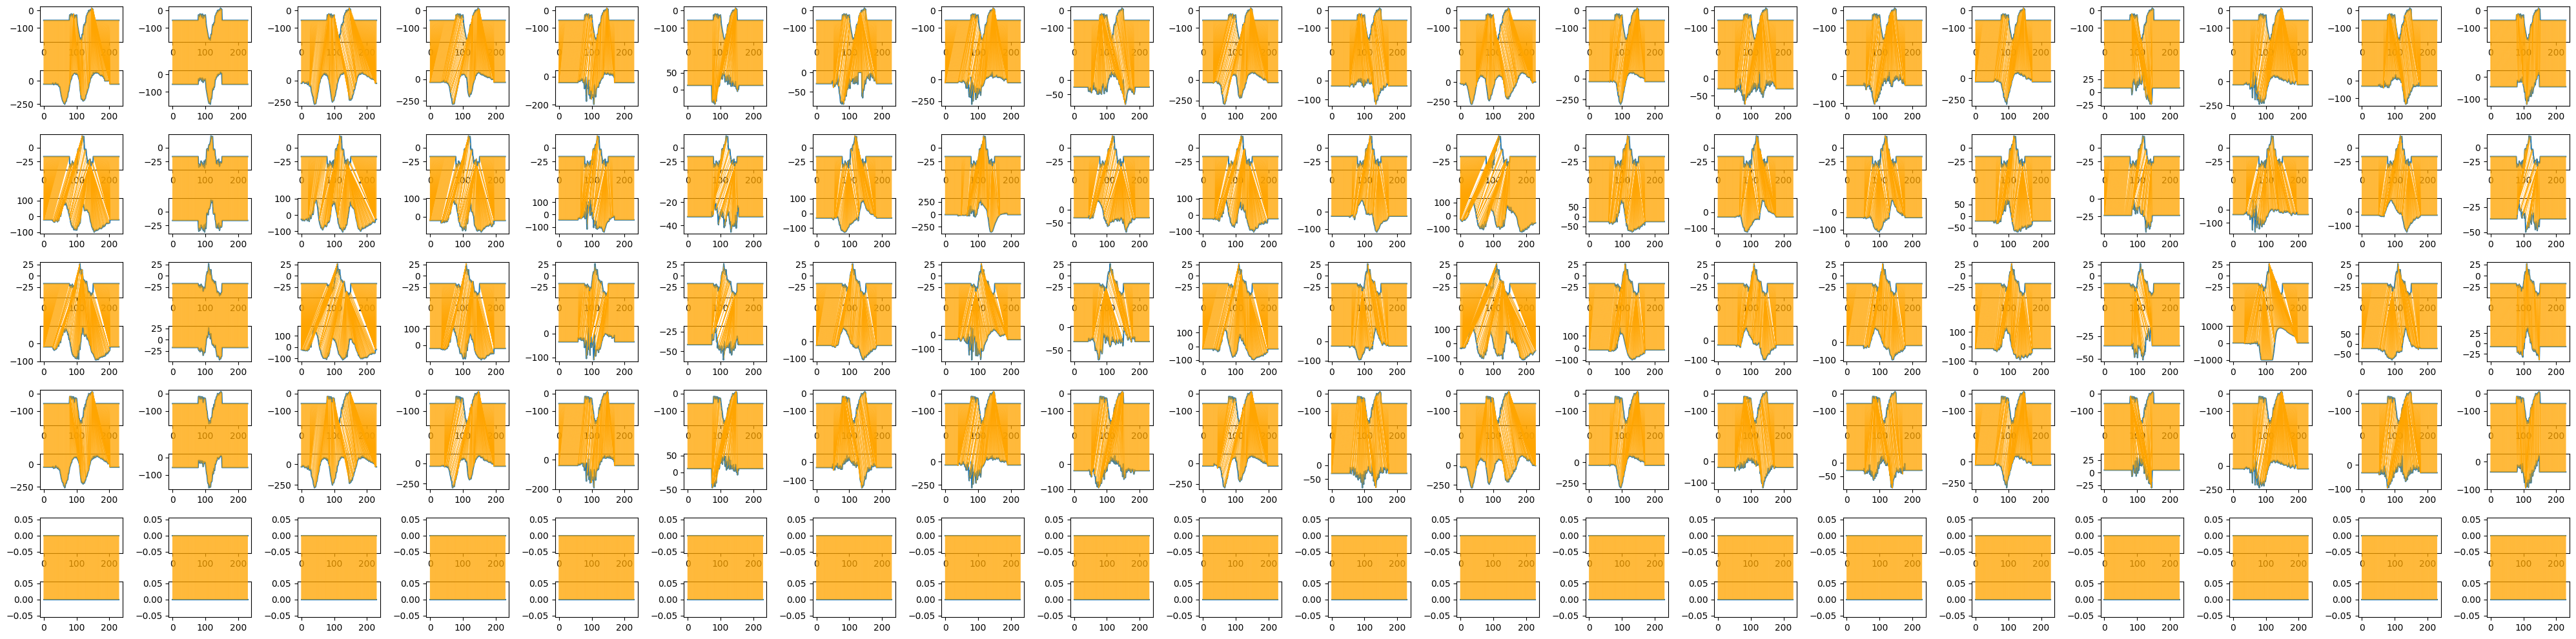

In [215]:
from dtaidistance import dtw
from dtaidistance import dtw_visualisation as dtwvis

r: int = 20

fig, axs = plt.subplots(10, r, figsize=(40, 10))

for i, ax in zip(range(0, r), axs.T):
    i1: int = 1
    i2: int = i

    a = x[i1]
    b = x[i2]

    print(data[i1].classification, data[i2].classification)

    d = sum([dtw.distance_fast(ai, bi) for ai, bi in zip(a, b)])

    print(d)

    for i in range(5):
        path = dtw.warping_path(a[i], b[i])
        dtwvis.plot_warping(a[i], b[i], path, axs=[ax[i * 2], ax[i * 2 + 1]], fig=fig)
plt.show()